In [6]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a synthetic but realistic dataset
np.random.seed(42)

data = {
    "Employee_ID": range(1, 501),
    "Age": np.random.randint(22, 60, 500),
    "Experience_Years": np.random.randint(1, 25, 500),
    "Education_Level": np.random.choice(["High School", "Bachelors", "Masters", "PhD"], 500),
    "Department": np.random.choice(["HR", "IT", "Finance", "Sales", "Marketing"], 500),
    "Performance_Rating": np.random.randint(1, 6, 500),
    "Salary": np.random.randint(30000, 180000, 500)
}

df = pd.DataFrame(data)

# Create Target Column (Promotion)
df["Promotion"] = np.where(
    (df["Performance_Rating"] >= 4) & (df["Experience_Years"] >= 5),
    "Yes",
    "No"
)

df = df.drop("Employee_ID", axis=1)

# Encode categorical columns
encoder = LabelEncoder()
for col in ["Education_Level", "Department", "Promotion"]:
    df[col] = encoder.fit_transform(df[col])

X = df.drop("Promotion", axis=1)
y = df["Promotion"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Scale features
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

colors = ["Red",
          "Blue",
          "Green"]
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, predictions)
    accuracy_scores[name] = acc

    print(f"============== {name} ==============")
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

============== Logistic Regression ==============
Accuracy: 0.928

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        75
           1       0.96      0.86      0.91        50

    accuracy                           0.93       125
   macro avg       0.93      0.92      0.92       125
weighted avg       0.93      0.93      0.93       125

Confusion Matrix:
 [[73  2]
 [ 7 43]]
============== Decision Tree ==============
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        50

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

Confusion Matrix:
 [[75  0]
 [ 0 50]]
============== Random Forest ==============
Accuracy: 1.0

Classification Report:
              

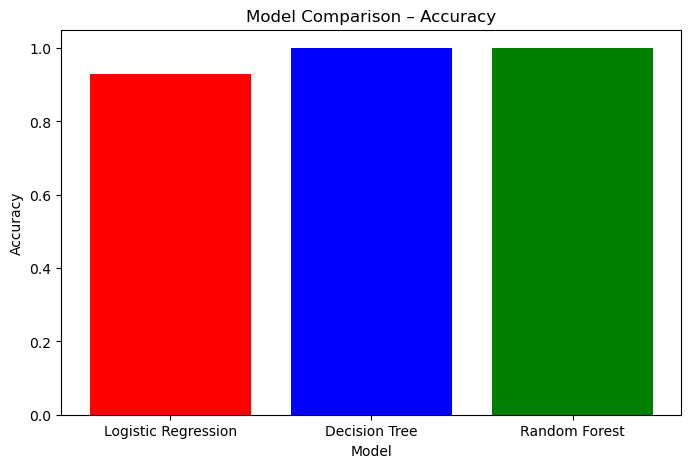

In [8]:
plt.figure(figsize=(8,5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(),color=colors)
plt.title("Model Comparison – Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

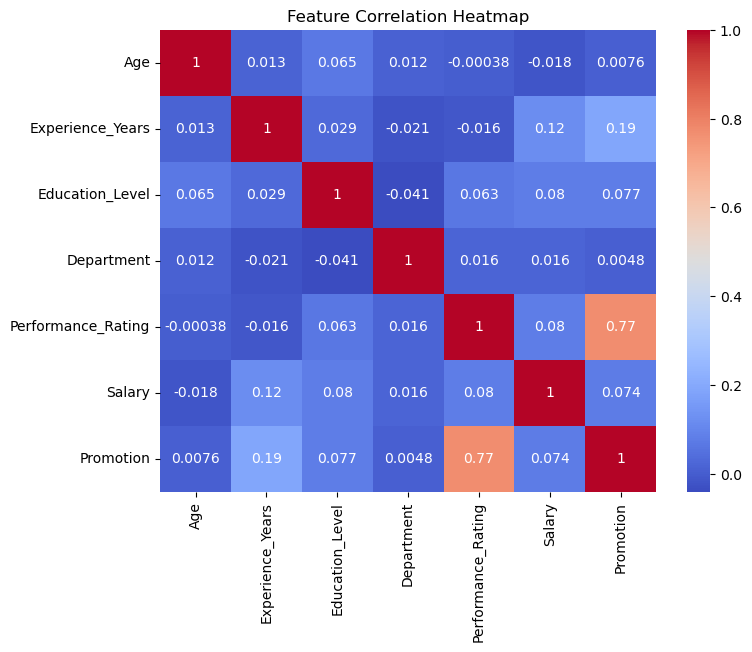

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

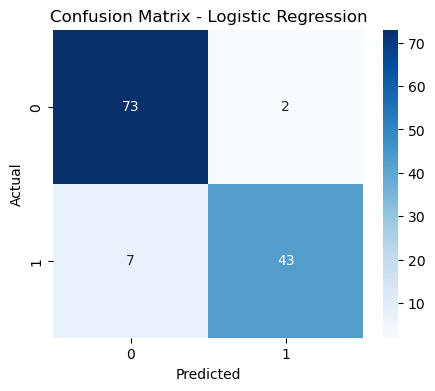

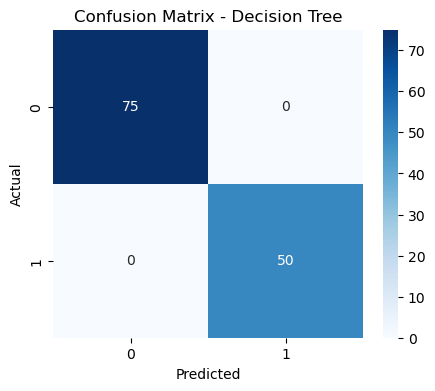

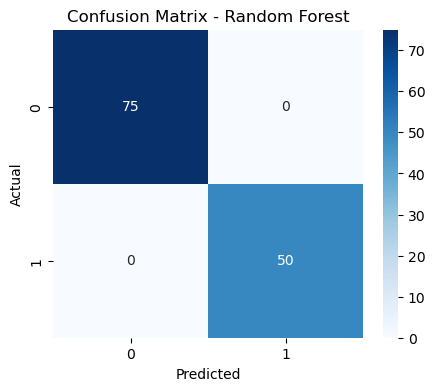

In [14]:
for name, model in models.items():
    plt.figure(figsize=(5,4))
    preds = model.predict(X_test_scaled)
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()